# Data Importing

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from  matplotlib.pyplot import plot
import statsmodels as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import six
import joblib
import sys
sys.modules['sklearn.externals.six'] = six
sys.modules['sklearn.externals.joblib'] = joblib
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model
import warnings
warnings.filterwarnings("ignore")

In [7]:
# importing benchmark interest rate dataset 
Gld = pd.read_csv("/Users/BENEL ENERGY/Downloads/GLD.csv", index_col='Date', parse_dates=True)
Vxus = pd.read_csv("/Users/BENEL ENERGY/Downloads/VXUS.csv", index_col='Date', parse_dates=True)
Gld

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-01,138.070007,140.190002,137.800003,139.630005,139.630005,12476200
2019-10-02,140.789993,141.880005,140.460007,141.259995,141.259995,11914300
2019-10-03,141.360001,143.250000,141.289993,141.899994,141.899994,12396100
2019-10-04,141.479996,142.309998,141.139999,141.899994,141.899994,9651000
2019-10-07,141.160004,141.770004,140.240005,140.690002,140.690002,6127200
2019-10-08,142.029999,142.289993,141.169998,141.919998,141.919998,10428900
2019-10-09,142.160004,142.580002,141.619995,142.050003,142.050003,6927700
2019-10-10,141.589996,141.660004,140.580002,140.809998,140.809998,9301700
2019-10-11,139.970001,140.190002,138.910004,140.029999,140.029999,11333400


# Data Processing and  Data Summary 

In [8]:
# calculate returns
r_Gld = Gld["Adj Close"].pct_change()
r_Vxus = Vxus["Adj Close"].pct_change()
print(r_Gld.head())

Date
2019-10-01         NaN
2019-10-02    0.011674
2019-10-03    0.004531
2019-10-04    0.000000
2019-10-07   -0.008527
Name: Adj Close, dtype: float64


### Averages 

In [11]:
# average price for the month of october (GOLD)
P_Gld = Gld[["Adj Close"]]
avr_oct_Gld = P_Gld[P_Gld.index< '2019-11-01'].mean()
print("The average price of Gold for the month of October:", avr_oct_Gld)

The average price of Gold for the month of October: Adj Close    140.874782
dtype: float64


In [12]:
# average price for the month of november (GOLD)
P_Gld = Gld[["Adj Close"]]
avr_nov_Gld = P_Gld[P_Gld.index>'2019-10-31'].mean()
print("The average price of Gold for the month of November:", avr_nov_Gld)

The average price of Gold for the month of November: Adj Close    138.5705
dtype: float64


In [13]:
# average price for the month of october (VXUS)
P_Vxus = Vxus[["Adj Close"]]
avr_oct_Vxus = P_Vxus[P_Vxus.index<'2019-11-01'].mean()
print("The average price of VXUS for the month of October:", avr_oct_Vxus)

The average price of VXUS for the month of October: Adj Close    49.596141
dtype: float64


In [14]:
# average price for the month of november (VXUS)
P_Vxus = Vxus[["Adj Close"]]
avr_nov_Vxus = P_Vxus[P_Vxus.index> '2019-10-31'].mean()
print("The average price of VXUS for the month of november:", avr_nov_Vxus)

The average price of VXUS for the month of november: Adj Close    51.441688
dtype: float64


### Standard Deviation 

In [15]:
# Standard Deviation of the yield for each benchmark for the month of october 2019
std_oct_ben = Bch_int[Bch_int.index < '2019-11-01'].std()
print("The Standard Deviation of the yield of each Benchmark for the month of October: \n",std_oct_ben)

The Standard Deviation of the yield of each Benchmark for the month of October: 
 2 Yr     0.080315
3 Yr     0.096443
5 Yr     0.104460
7 Yr     0.100653
10 Yr    0.104808
30 Yr    0.101300
dtype: float64


In [16]:
# Standard Deviation of the yield for each benchmark for the month of november 2019
std_nov_ben = Bch_int[Bch_int.index > '2019-10-31'].std()
print("The Standard Deviation of the yield of each Benchmark for the month of November: \n",std_nov_ben)

The Standard Deviation of the yield of each Benchmark for the month of November: 
 2 Yr     0.033804
3 Yr     0.044043
5 Yr     0.052755
7 Yr     0.061039
10 Yr    0.065028
30 Yr    0.076918
dtype: float64


In [17]:
# Standard Deviation of the price for the month of october 2019 (GOLD)
P_Gld = Gld[["Adj Close"]]
std_oct_Gld = P_Gld[P_Gld.index<'2019-11-01'].std()
print("The Standard Deviation of the price of Gold for the month of October:", std_oct_Gld)

The Standard Deviation of the price of Gold for the month of October: Adj Close    0.831229
dtype: float64


In [18]:
# Standard Deviation of the price for the month of november 2019 (GOLD)
P_Gld = Gld[["Adj Close"]]
std_nov_Gld = P_Gld[P_Gld.index>'2019-10-31'].std()
print("The Standard Deviation of the price of Gold for the month of November:", std_nov_Gld)

The Standard Deviation of the price of Gold for the month of November: Adj Close    1.562095
dtype: float64


In [19]:
# Standard Deviation of the price for the month of october 2019 (VXUS)
P_Vxus = Vxus[["Adj Close"]]
std_oct_Vxus = P_Vxus[P_Vxus.index< '2019-11-01'].std()
print("The Standard Deviation of the price of VXUS for the month of October:", std_oct_Vxus)

The Standard Deviation of the price of VXUS for the month of October: Adj Close    1.019105
dtype: float64


In [20]:
# Standard Deviation of the price for the month of november 2019 (VXUS)
P_Vxus = Vxus[["Adj Close"]]
std_nov_Vxus = P_Vxus[P_Vxus.index> '2019-10-31'].std()
print("The Standard Deviation of the price of VXUS for the month of November:", std_nov_Vxus)

The Standard Deviation of the price of VXUS for the month of November: Adj Close    0.197157
dtype: float64


# Graphs

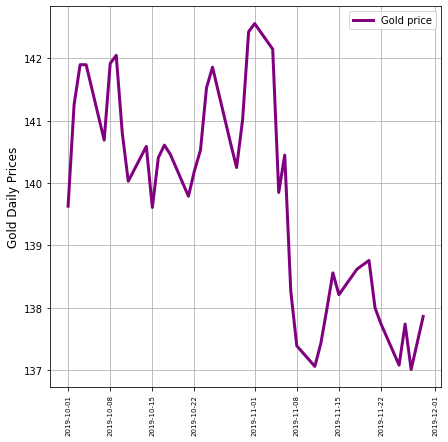

In [21]:
#Graph for Gold 
G1 = Gld["Adj Close"]

plt.figure(figsize = (7, 7))
plt.plot(G1, label = "Gold price", color = "purple", linewidth = 3)
plt.ylabel("Gold Daily Prices", fontsize = 12)

plt.grid()
plt.legend()

plt.xticks(rotation = 90, fontsize = 7)
plt.yticks(fontsize = 10)

plt.show()

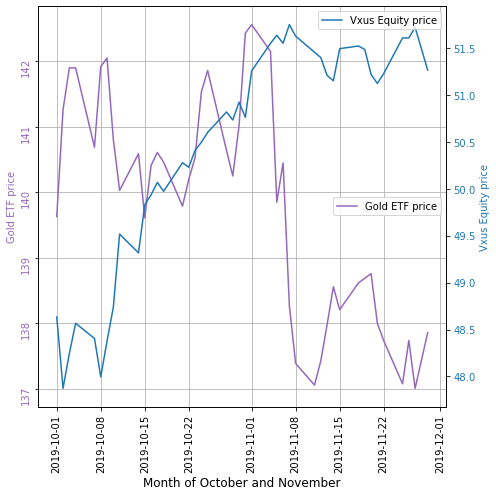

In [22]:
v1 = Vxus["Adj Close"]


# Plotting the equity and gold prices in the same graph 
fig, ax1 = plt.subplots(figsize = (7, 7))

color = 'tab:purple'
ax1.set_xlabel('Month of October and November', fontsize = 12)
ax1.set_ylabel('Gold ETF price', color = color)
ax1.plot(G1, label = 'Gold ETF price',  color = color)
ax1.tick_params(axis = 'y', labelcolor = color)
ax1.tick_params(rotation = 90)
ax1.legend(loc = 5)

ax2 = ax1.twinx()  #  instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Vxus Equity price', color=color)  # we already handled the x-label with ax1
ax2.plot(v1, label = 'Vxus Equity price',  color=color)
ax2.tick_params(axis='y',  labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.grid()

ax2.legend(loc = 'upper right')

plt.show()



# Model Pricing 

### MODEL STATIONARITY TEST AND DIFFERENCING 

In [23]:
#first test for stationarity of dataset(GOLD)
#OCTOBER GOLD
#Perform ADF Test
from statsmodels.tsa.stattools import adfuller
adf = adfuller(Gld["Adj Close"]['2019-10-01':'2019-11-01'], maxlag = None,)
print(adf[0])

#Critical values
print(adf[4])

print( "ADF = " + str(adf[0]))
print("p-value = " +str(adf[1]))

if adf[1] < 0.05:
    print('Stationary series')
else:
    print('Non Stationary series')
    
#Gold data for october is not stationary


#NOVEMBER GOLD
#Perform ADF Test
from statsmodels.tsa.stattools import adfuller
adf = adfuller(Gld["Adj Close"]['2019-11-01':'2019-11-30'], maxlag = None,)
print(adf[0])

#Critical values
print(adf[4])

print( "ADF = " + str(adf[0]))
print("p-value = " +str(adf[1]))

if adf[1] < 0.05:
    print('Stationary series')
else:
    print('Non Stationary series')
    
#Gold data for is stationary

-2.169409387325933
{'1%': -3.9240193847656246, '5%': -3.0684982031250003, '10%': -2.67389265625}
ADF = -2.169409387325933
p-value = 0.21753478275332544
Non Stationary series
-2.9500881213905896
{'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}
ADF = -2.9500881213905896
p-value = 0.03982580204096174
Stationary series


In [24]:
#Differencing to make data stationary 
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

Gold_oct  = difference(Gld["Adj Close"]['2019-10-01':'2019-11-01'])
Gold_nov  = Gld["Adj Close"]['2019-11-01':'2019-11-30']
Gld_oct  = Gld["Adj Close"]['2019-10-01':'2019-11-01']

In [25]:
#AFter Differencing OCTOBER Gold

#Perform ADF Test again
from statsmodels.tsa.stattools import adfuller
adf = adfuller(Gold_oct, maxlag = None,)
print(adf[0])

#Critical values
print(adf[4])

print( "ADF = " + str(adf[0]))
print("p-value = " +str(adf[1]))

if adf[1] < 0.05:
    print('Stationary series')
else:
    print('Non Stationary series')
        
# now the Gold data is stationary (For both month)

-4.016970941816458
{'1%': -4.068853732362312, '5%': -3.1271488757396453, '10%': -2.7017297633136095}
ADF = -4.016970941816458
p-value = 0.0013242075724741508
Stationary series


### GOLD OCTOBER ACF AND PCF

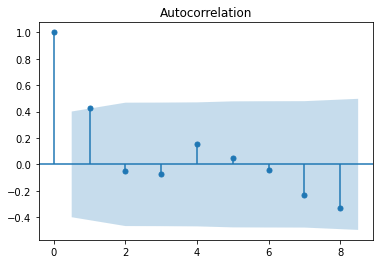

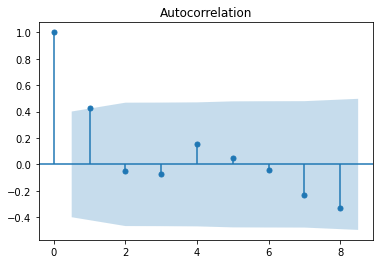

In [26]:
# ACF for Gold data for october (first 21 data) 
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(Gld_oct.values.squeeze(), lags = 8)

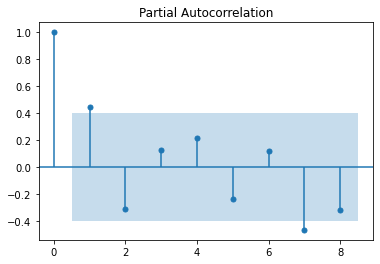

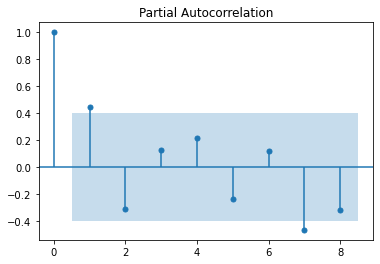

In [27]:
#pacf for Gold data for october (first 21 data)
sm.graphics.tsa.plot_pacf(Gld_oct.values.squeeze(), lags = 8)

### GOLD NOVEMBER ACF AND PCF

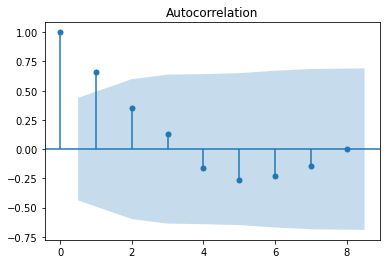

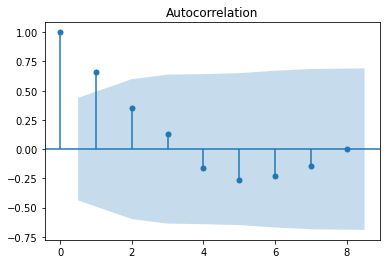

In [28]:
# ACF for Gold data for november  
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(Gold_nov.values.squeeze(), lags = 8)

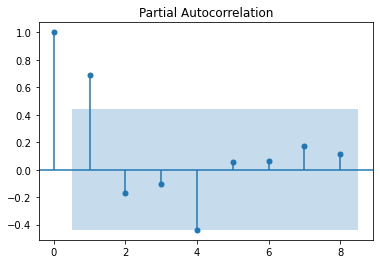

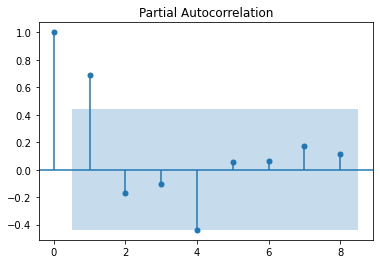

In [29]:
#pacf for Gold data for november
sm.graphics.tsa.plot_pacf(Gold_nov.values.squeeze(), lags = 8)

### GOLD MODEL SELECTION FOR OCTOBER AND NOVEMBER

In [30]:
#GOLD: From the ACF and Pacf chart for October and November our choice arima model is October: ARIMA(1, 1, 1) and November 
#ARIMA(1, 0, 0)
Gold_oct_arima = ARIMA(Gld["Adj Close"]['2019-10-01':'2019-11-01'], order=(1,1,1))
Gold_nov_arima = ARIMA(Gld["Adj Close"]['2019-11-01':'2019-11-30'], order=(1,0,0))

Gd = Gld["Adj Close"]['2019-10-01':'2019-11-01']
Gd1 = Gld["Adj Close"]['2019-11-01':'2019-11-30']
#fit the models
Gld_oct = Gold_oct_arima.fit()
Gld_nov = Gold_nov_arima.fit()

In [31]:
#Model October Gold model 
print('The AIC value for the Gold October ARIMA model is', Gld_oct.aic)
print('The BIC value for the Gold October ARIMA model is', Gld_oct.bic)
print('The HQIC value for the Gold October ARIMA model is', Gld_oct.hqic)

The AIC value for the Gold October ARIMA model is 62.08439431471505
The BIC value for the Gold October ARIMA model is 66.62637117843164
The HQIC value for the Gold October ARIMA model is 63.22668876507322


In [32]:
#Model November Gold model 
print('The AIC value for the Gold November ARIMA model is', Gld_nov.aic)
print('The BIC value for the Gold November ARIMA model is', Gld_nov.bic)
print('The HQIC value for the Gold November ARIMA model is', Gld_nov.hqic)

The AIC value for the Gold November ARIMA model is 59.29586879193751
The BIC value for the Gold November ARIMA model is 62.28306561259948
The HQIC value for the Gold November ARIMA model is 59.8790009941272


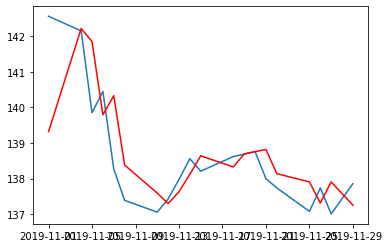

In [33]:
# plots for november(visualizing fitting the model)
plt.plot(Gld["Adj Close"]['2019-11-01':'2019-11-30'])
plt.plot(Gld_nov.fittedvalues, color='red')

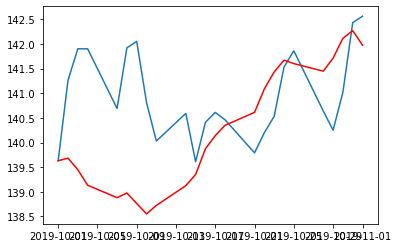

In [34]:
# plot for fitted region (Gold--October)
predictions_ARIMA_diff = pd.Series(Gld_oct.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_d = pd.Series(Gd.iloc[0], index=Gd.index)
predictions_ARIMA = predictions_ARIMA_d.add(predictions_ARIMA_diff_cumsum, fill_value=0)
#predictions_ARIMA = np.exp(predictions_ARIMA)


plt.plot(Gd)
plt.plot(predictions_ARIMA, color = 'r')

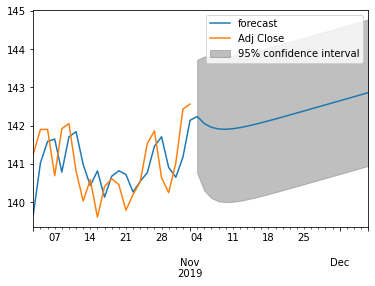

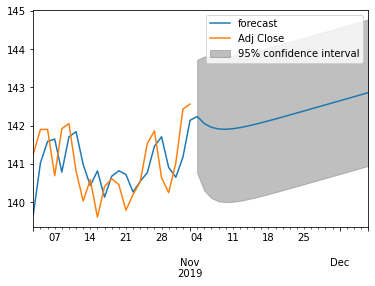

In [35]:
Gld_oct.plot_predict(1,48)

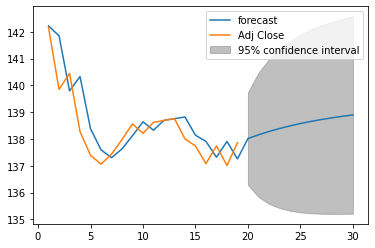

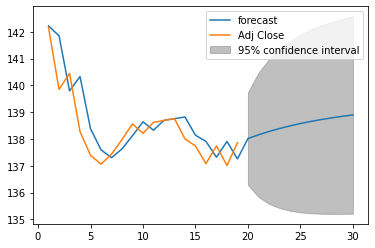

In [36]:
Gld_nov.plot_predict(1, 30)

### EQUITY STATIONARITY TEST

In [37]:
#first test for stationarity of dataset(Vxus)
Vxus_oct = Vxus["Adj Close"]['2019-10-01':'2019-11-01']
Vxus_nov = Vxus["Adj Close"]['2019-11-01':'2019-11-30']
#Perform ADF Test (OCTOBER)
from statsmodels.tsa.stattools import adfuller
adf = adfuller(Vxus_oct, maxlag = None,)
print(adf[0])

#Critical values
print(adf[4])

print( "ADF = " + str(adf[0]))
print("p-value = " +str(adf[1]))

if adf[1] < 0.05:
    print('Stationary series')
else:
    print('Non Stationary series')
    
#October dataset is stationary for Vxus (Equity) 

-4.3982774127376825
{'1%': -3.9644434814814815, '5%': -3.0849081481481484, '10%': -2.6818144444444445}
ADF = -4.3982774127376825
p-value = 0.0002989231905983093
Stationary series


In [38]:
#Perform ADF Test (NOVEMBER)
from statsmodels.tsa.stattools import adfuller
adf = adfuller(Vxus_nov, maxlag = None,)
print(adf[0])

#Critical values
print(adf[4])

print( "ADF = " + str(adf[0]))
print("p-value = " +str(adf[1]))

if adf[1] < 0.05:
    print('Stationary series')
else:
    print('Non Stationary series')
    
#Novermber dataset is stationary for Vxus (Equity) 

-6.838218751372896
{'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}
ADF = -6.838218751372896
p-value = 1.8193248517439285e-09
Stationary series


### ACF AND PACF FOR EQUITY OCTOBER AND NOVEMBER DATASET

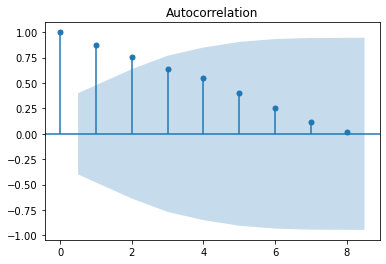

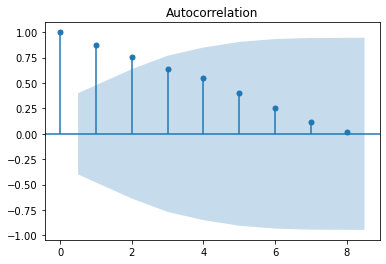

In [39]:
# ACF for Equity data for october 
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(Vxus_oct.values.squeeze(), lags = 8)

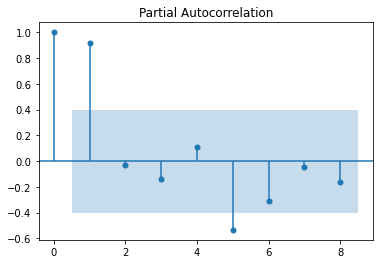

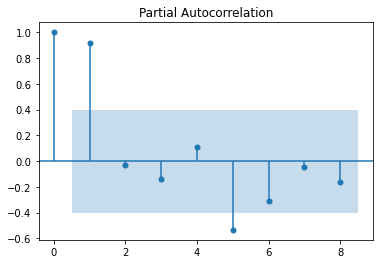

In [40]:
# PACF for Equity data for october 
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(Vxus_oct.values.squeeze(), lags = 8)

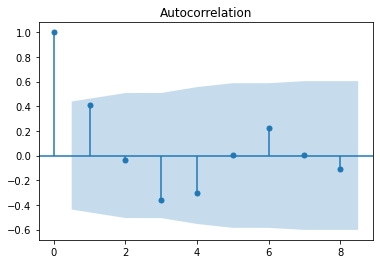

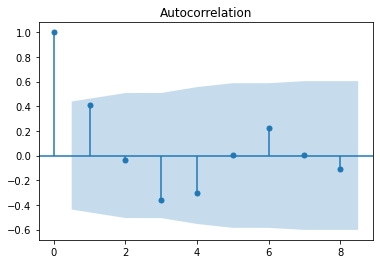

In [41]:
# ACF for Equity data for November 
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(Vxus_nov.values.squeeze(), lags = 8)

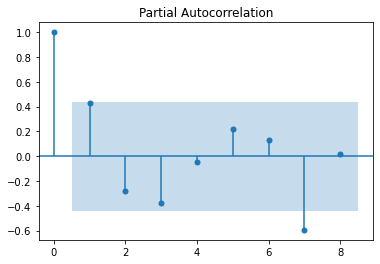

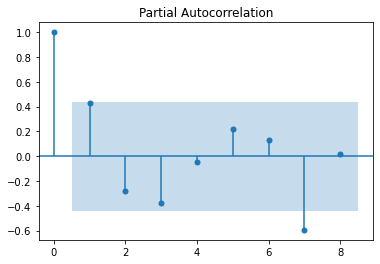

In [42]:
# PACF for Equity data for November 
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(Vxus_nov.values.squeeze(), lags = 8)

### MODEL SELECTION FOR EQUITY DATASET FOR NOVEMBER AND OCTOBER

In [43]:
#Vxus: From the ACF and Pacf chart for October and November, our choice arima model is October: ARIMA(1, 0, 0) and November 
#ARIMA(1, 0, 0)
Vxus_oct_arima = ARIMA(Vxus_oct, order=(1,0,0))
Vxus_nov_arima = ARIMA(Vxus_nov, order=(1,0,1))

#fit the models
Vxus_oct = Vxus_oct_arima.fit()
Vxus_nov = Vxus_nov_arima.fit()

In [44]:
#Model October Vxus model 
print('The AIC value for the Vxus October ARIMA model is', Vxus_oct.aic)
print('The BIC value for the Vxus October ARIMA model is', Vxus_oct.bic)
print('The HQIC value for the Vxus October ARIMA model is', Vxus_oct.hqic)

The AIC value for the Vxus October ARIMA model is 25.144051699463247
The BIC value for the Vxus October ARIMA model is 28.678213190507087
The HQIC value for the Vxus October ARIMA model is 26.081665737902533


In [45]:
#Model November November model 
print('The AIC value for the Vxus November ARIMA model is', Vxus_nov.aic)
print('The BIC value for the Vxus November ARIMA model is', Vxus_nov.bic)
print('The HQIC value for the Vxus November ARIMA model is', Vxus_nov.hqic)

The AIC value for the Vxus November ARIMA model is -6.246954115093999
The BIC value for the Vxus November ARIMA model is -2.2640250208780355
The HQIC value for the Vxus November ARIMA model is -5.469444512174409


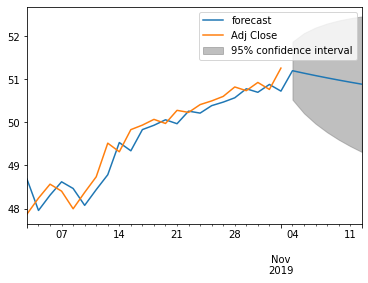

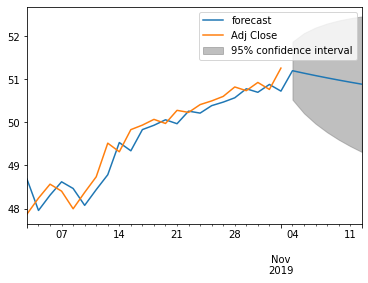

In [51]:
Vxus_oct.plot_predict(1,30)

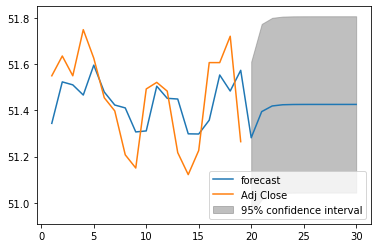

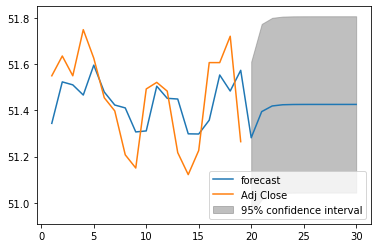

In [50]:
Vxus_nov.plot_predict(1,30)

### After some explanatory Analysis, I built an ARIMA model to model the price of the assests.